# 2 Importações

In [ ]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname(__file__), '../../') if '__file__' in globals() else '../../')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from src.util import dados_limpos_Cor_Raca

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../../data/raw/DH_2022_Br_Regioes_20240423.xlsx - Cor_raça do responsável.csv")
df_regioes, df_brasil = dados_limpos_Cor_Raca(df)

c:\Users\mtand\municipal-housing-data\notebooks\Cor e raça do responsável\../..\src\util.py:175: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['id_regiao'].fillna(method='ffill', inplace=True)
c:\Users\mtand\municipal-housing-data\notebooks\Cor e raça do responsável\../..\src\util.py:175: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['id_regiao'].fillna(method='ffill', inplace=True)


# 2.2 Panorama Nacional

C:\Users\mtand\AppData\Local\Temp\ipykernel_7800\3034689925.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


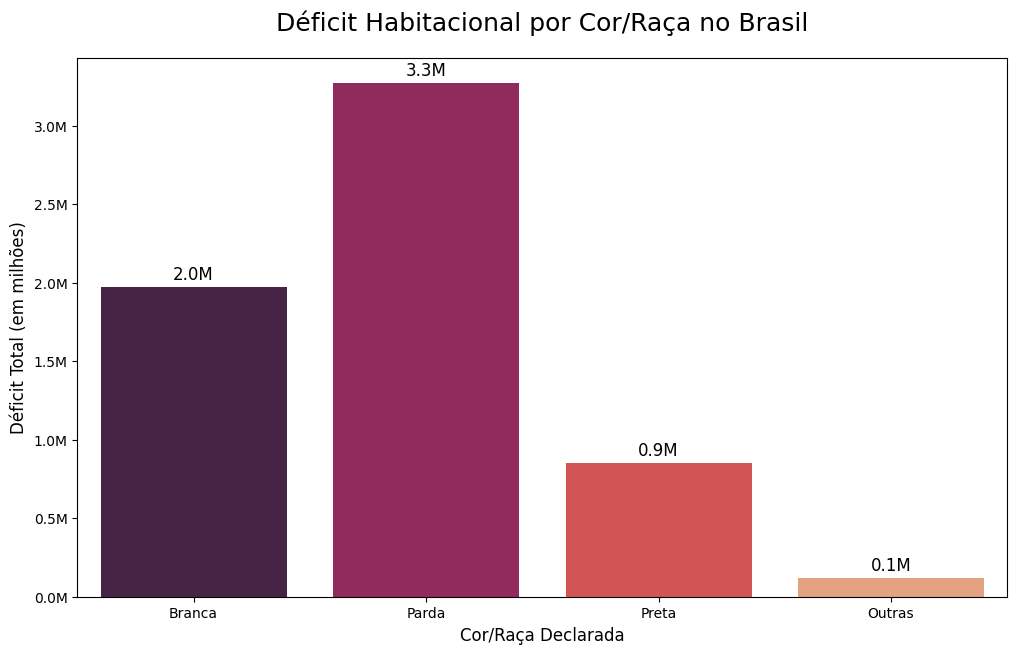

In [3]:
df_brasil = df[df['regiao'] == 'Brasil'].copy()

ordem_raca = ['Branca', 'Parda', 'Preta', 'Outras']
df_brasil['cor_raca'] = pd.Categorical(df_brasil['cor_raca'], categories=ordem_raca, ordered=True)

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=df_brasil, 
    x='cor_raca', 
    y='deficit_total', 
    palette='rocket'
)

plt.title('Déficit Habitacional por Cor/Raça no Brasil', fontsize=18, pad=20)
plt.xlabel('Cor/Raça Declarada', fontsize=12)
plt.ylabel('Déficit Total (em milhões)', fontsize=12)

formatter = plt.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

for p in ax.patches:
    ax.annotate(f'{p.get_height()/1e6:.1f}M', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=12)

plt.show()

# 2.3 Análise Regional

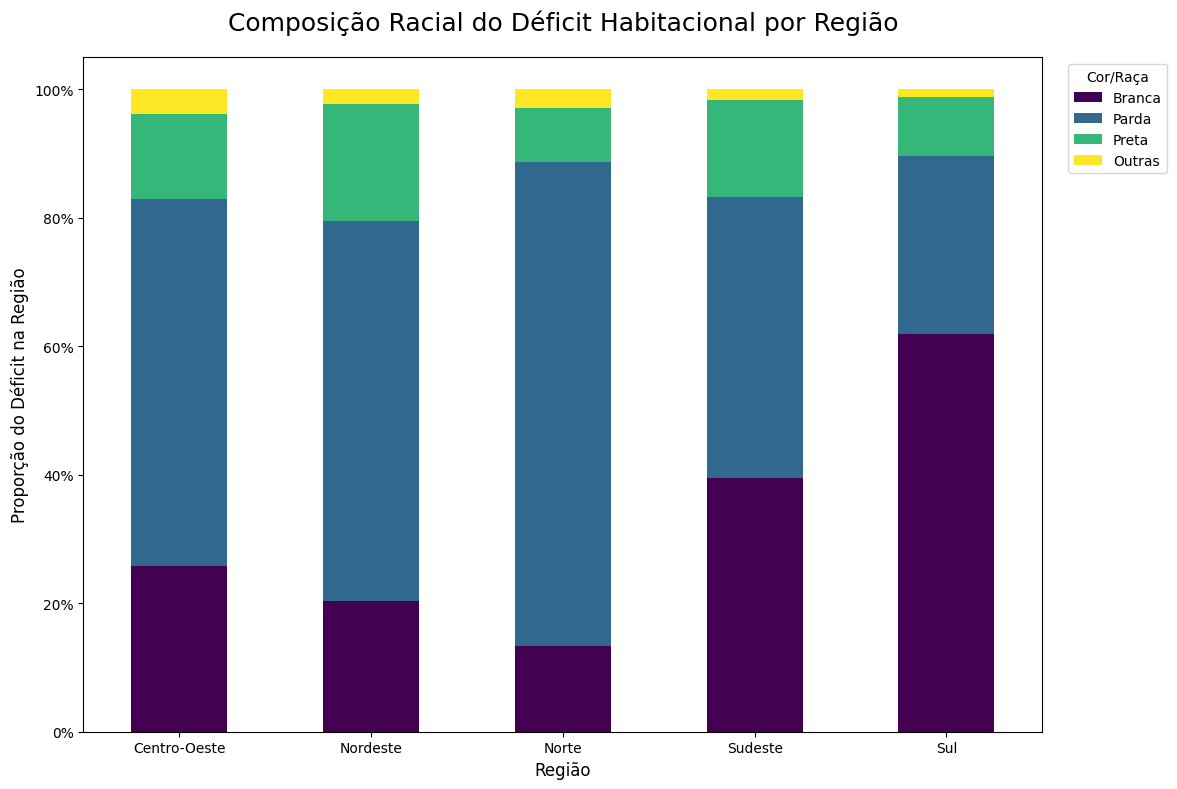

In [6]:
pivot_raca_regiao = df_regioes.pivot_table(
    index='regiao', 
    columns='cor_raca', 
    values='deficit_total', 
    aggfunc='sum'
)

composicao_percentual = pivot_raca_regiao.div(pivot_raca_regiao.sum(axis=1), axis=0)

composicao_percentual[['Branca', 'Parda', 'Preta', 'Outras']].plot(
    kind='bar', 
    stacked=True, 
    figsize=(14, 8), 
    colormap='viridis'
)

plt.title('Composição Racial do Déficit Habitacional por Região', fontsize=18, pad=20)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Proporção do Déficit na Região', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Cor/Raça', bbox_to_anchor=(1.02, 1), loc='upper left')

formatter = plt.FuncFormatter(lambda y, pos: f'{y:.0%}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig('../../reports/images/composicao_racial_deficit_regioes.png', dpi=300, bbox_inches='tight')
plt.show()

# 2.4 Análise dos Componentes

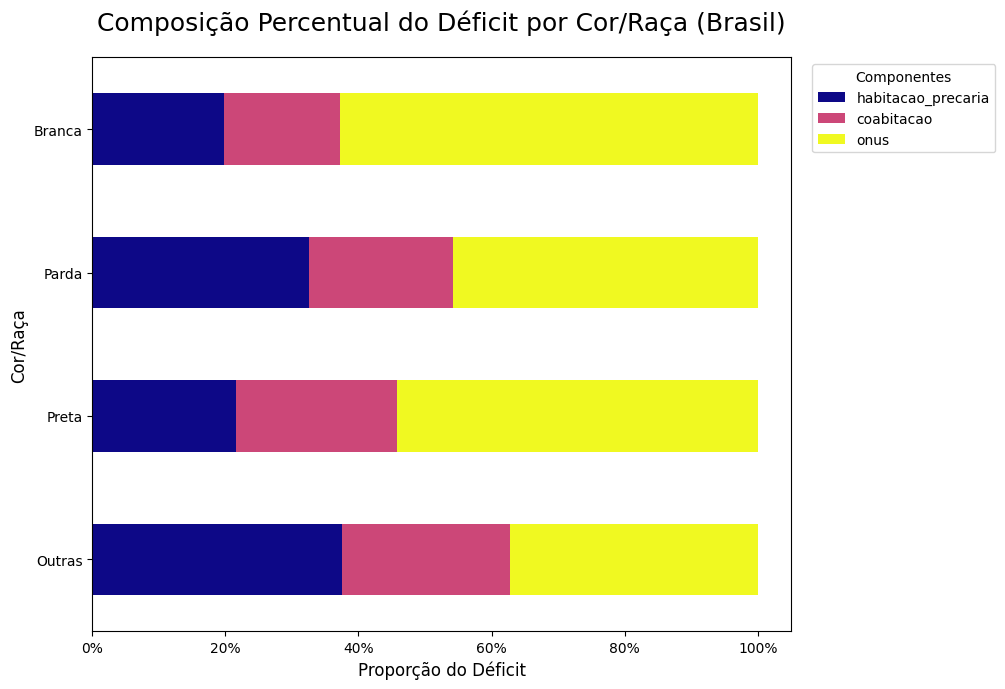

In [5]:
componentes_raca = df_brasil.set_index('cor_raca')[['habitacao_precaria', 'coabitacao', 'onus']]

componentes_raca_percentual = componentes_raca.div(componentes_raca.sum(axis=1), axis=0)

componentes_raca_percentual.plot(
    kind='barh', 
    stacked=True, 
    figsize=(12, 7), 
    colormap='plasma'
)

plt.title('Composição Percentual do Déficit por Cor/Raça (Brasil)', fontsize=18, pad=20)
plt.xlabel('Proporção do Déficit', fontsize=12)
plt.ylabel('Cor/Raça', fontsize=12)
plt.legend(title='Componentes', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.gca().invert_yaxis() 

formatter = plt.FuncFormatter(lambda x, pos: f'{x:.0%}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()